#### 3A. Descriptive Analytics

In [276]:
# ==============================================
# DESCRIPTIVE ANALYTICS: GENDER PAY GAP BY EDUCATION LEVEL
# ==============================================

# 1. Filter the data for employed individuals
employed= abt[abt['EMPSTAT'] == 'Employed'].copy()

# 2. Get top 5 most common education levels
top_5_educ = employed['EDUC'].value_counts().head(5).index

# 3. Calculate median income by education and gender
educ_gender_earnings = (
    employed[employed['EDUC'].isin(top_5_educ)]
    .groupby(['EDUC', 'SEX'])['INCEARN']
    .median()
    .unstack()
    .dropna()  # Remove education levels without both genders
    .sort_values(by='Male', ascending=False)
    .rename(columns={'Male': 'Male_Median', 'Female': 'Female_Median'})
)

# 4. Calculate pay gap metrics
educ_gender_earnings['Pay_Gap'] = educ_gender_earnings['Male_Median'] - educ_gender_earnings['Female_Median']
educ_gender_earnings['Pay_Gap_Pct'] = (
    (educ_gender_earnings['Pay_Gap'] / educ_gender_earnings['Female_Median']) * 100
).round(1)


# 6. Display results
print("="*80)
print("GENDER EARNINGS COMPARISON BY TOP 5 EDUCATION LEVELS")
print("="*80)
display(educ_gender_earnings.style.format({
    'Male_Median': '${:,.0f}',
    'Female_Median': '${:,.0f}',
    'Pay_Gap': '${:,.0f}',
    'Pay_Gap_Pct': '{:.1f}%'
}))

# 7. Sample sizes
print("\nSAMPLE SIZES BY EDUCATION LEVEL AND GENDER:")
educ_samples = employed[employed['EDUC'].isin(top_5_educ)]
print(educ_samples.groupby(['EDUC', 'SEX']).size().unstack())

GENDER EARNINGS COMPARISON BY TOP 5 EDUCATION LEVELS


SEX,Female_Median,Male_Median,Pay_Gap,Pay_Gap_Pct
EDUC,,,,
5+ years of college,"$80,000","$110,000","$30,000",37.5%
4 years of college,"$60,000","$80,000","$20,000",33.3%
2 years of college,"$44,700","$60,000","$15,300",34.2%
1 year of college,"$40,000","$54,000","$14,000",35.0%
Grade 12,"$35,000","$45,000","$10,000",28.6%



SAMPLE SIZES BY EDUCATION LEVEL AND GENDER:
SEX                  Female   Male
EDUC                              
1 year of college     26490  34130
2 years of college    23700  24068
4 years of college    61890  69933
5+ years of college   44506  44792
Grade 12              57512  92228


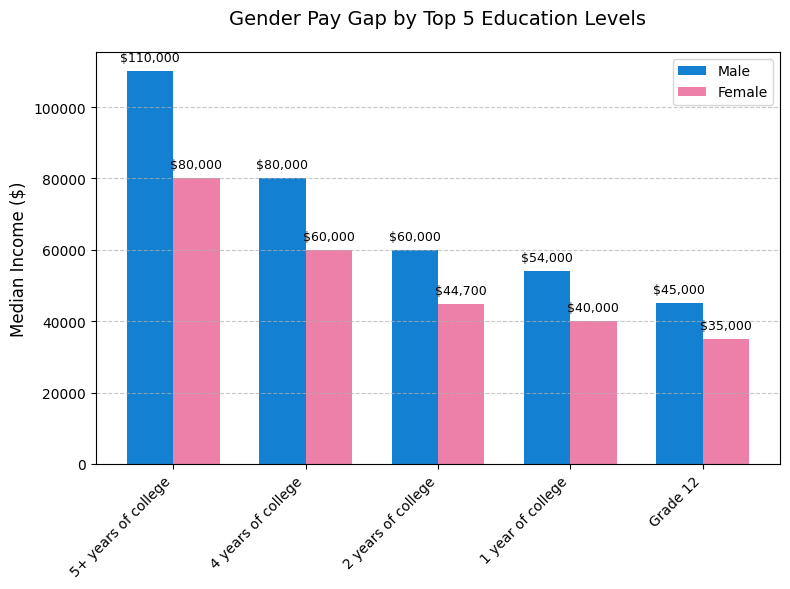

In [284]:
# ==============================================
# VISUALIZATION
# ==============================================

plt.figure(figsize=(8, 6))
width = 0.35
x = np.arange(len(educ_gender_earnings))

male_bars = plt.bar(x - width/2, educ_gender_earnings['Male_Median'], 
                   width, label='Male', color='#1480D1')
female_bars = plt.bar(x + width/2, educ_gender_earnings['Female_Median'], 
                     width, label='Female', color='#EC80A9')

# Add value labels
for i, (_, row) in enumerate(educ_gender_earnings.iterrows()):
    plt.text(i - width/2, row['Male_Median'] + 2000, 
            f"${row['Male_Median']:,.0f}", 
            ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, row['Female_Median'] + 2000, 
            f"${row['Female_Median']:,.0f}", 
            ha='center', va='bottom', fontsize=9)


plt.title('Gender Pay Gap by Top 5 Education Levels', fontsize=14, pad=20)
plt.ylabel('Median Income ($)', fontsize=12)
plt.xticks(x, educ_gender_earnings.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [279]:

# DESCRIPTIVE ANALYTICS: GENDER PAY GAP BY OCCUPATION

# 1. Filter the data
# Ensure we're working with employed individuals only
employed = abt[abt['EMPSTAT'] == 'Employed'].copy()

#Create a mapping for Occupation codes
occ_mapping = {
    '1110XX': 'Chief Executives and Legislators',
    '291020': 'Dentists',
    '291151': 'Nurse Anesthetists',
    '291210': 'Physicians',
    '291240': 'Surgeons',
    '319094': 'Medical Transcriptionists',
    '353023': 'Fast Food and Counter Workers',
    '359021': 'Dishwashers',
    '39509X': 'Other Personal Appearance Workers',
    '419041': 'Telemarketers'
}

# Create a new column with mapped occupation names
employed['OCCUPATION_NAME'] = employed['OCCSOC'].map(occ_mapping)

# 2. Calculate median income by occupation and gender
occ_gender_earnings = (
    employed.groupby(['OCCUPATION_NAME', 'SEX'])['INCEARN']
    .median()
    .unstack()
    .dropna()  # Remove occupations without both genders
    .sort_values(by='Male', ascending=False)  # Sort by male median income
    .rename(columns={'Male': 'Male_Median', 'Female': 'Female_Median'})
)

# 3. Calculate pay gap metrics
occ_gender_earnings['Pay_Gap'] = occ_gender_earnings['Male_Median'] - occ_gender_earnings['Female_Median']
occ_gender_earnings['Pay_Gap_Pct'] = (
    (occ_gender_earnings['Pay_Gap'] / occ_gender_earnings['Female_Median']) * 100
).round(1)

# 4. Get top and bottom 5 paying occupations
top5_occupations = occ_gender_earnings.head(5)
bottom5_occupations = occ_gender_earnings.tail(5)


# 6. Display results
print("="*80)
print("TOP 5 HIGHEST PAYING OCCUPATIONS - GENDER EARNINGS COMPARISON")
print("="*80)
display(top5_occupations.style.format({
    'Male_Median': '${:,.0f}',
    'Female_Median': '${:,.0f}',
    'Pay_Gap': '${:,.0f}',
    'Pay_Gap_Pct': '{:.1f}%'
}))

print("\n" + "="*80)
print("BOTTOM 5 LOWEST PAYING OCCUPATIONS - GENDER EARNINGS COMPARISON")
print("="*80)
display(bottom5_occupations.style.format({
    'Male_Median': '${:,.0f}',
    'Female_Median': '${:,.0f}',
    'Pay_Gap': '${:,.0f}',
    'Pay_Gap_Pct': '{:.1f}%'
}))


# 7. Additional analysis - sample sizes
print("\nSAMPLE SIZES FOR TOP OCCUPATIONS:")
top_occ_samples = employed[employed['OCCUPATION_NAME'].isin(top5_occupations.index)]
print(top_occ_samples.groupby(['OCCUPATION_NAME', 'SEX']).size().unstack())

print("\nSAMPLE SIZES FOR BOTTOM OCCUPATIONS:")
bottom_occ_samples = employed[employed['OCCUPATION_NAME'].isin(bottom5_occupations.index)]
print(bottom_occ_samples.groupby(['OCCUPATION_NAME', 'SEX']).size().unstack())

TOP 5 HIGHEST PAYING OCCUPATIONS - GENDER EARNINGS COMPARISON


SEX,Female_Median,Male_Median,Pay_Gap,Pay_Gap_Pct
OCCUPATION_NAME,,,,
Surgeons,"$439,500","$459,000","$19,500",4.4%
Physicians,"$200,000","$275,000","$75,000",37.5%
Dentists,"$127,500","$190,000","$62,500",49.0%
Nurse Anesthetists,"$170,000","$190,000","$20,000",11.8%
Chief Executives and Legislators,"$122,000","$165,000","$43,000",35.2%



BOTTOM 5 LOWEST PAYING OCCUPATIONS - GENDER EARNINGS COMPARISON


SEX,Female_Median,Male_Median,Pay_Gap,Pay_Gap_Pct
OCCUPATION_NAME,,,,
Telemarketers,"$29,550","$24,000","$-5,550",-18.8%
Dishwashers,"$20,400","$23,000","$2,600",12.7%
Fast Food and Counter Workers,"$22,000","$22,000",$0,0.0%
Medical Transcriptionists,"$32,500","$22,000","$-10,500",-32.3%
Other Personal Appearance Workers,"$25,000","$20,000","$-5,000",-20.0%



SAMPLE SIZES FOR TOP OCCUPATIONS:
SEX                               Female  Male
OCCUPATION_NAME                               
Chief Executives and Legislators    1960  5042
Dentists                             140   342
Nurse Anesthetists                    93    77
Physicians                          1373  2389
Surgeons                              58   217

SAMPLE SIZES FOR BOTTOM OCCUPATIONS:
SEX                                Female  Male
OCCUPATION_NAME                                
Dishwashers                            53   190
Fast Food and Counter Workers         430   249
Medical Transcriptionists              97    11
Other Personal Appearance Workers      27     3
Telemarketers                          38    19


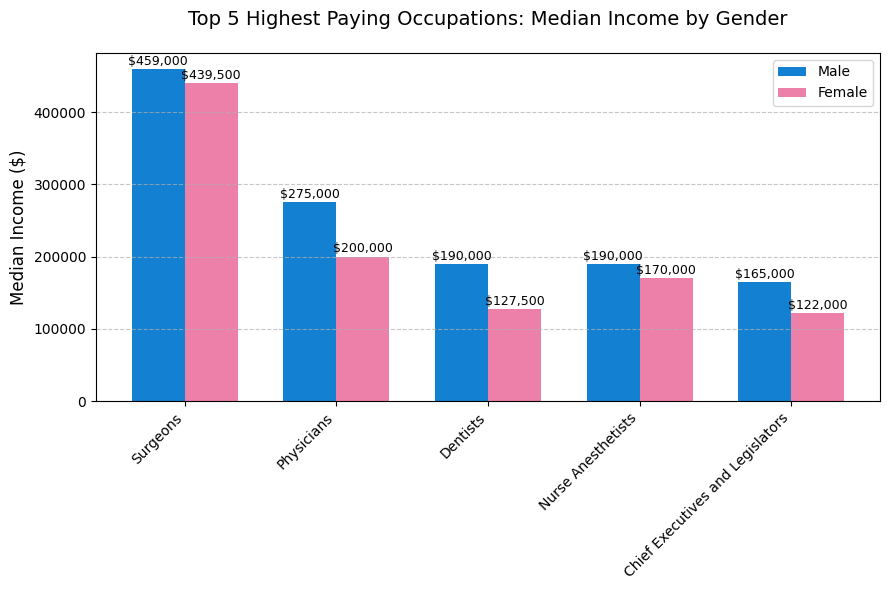

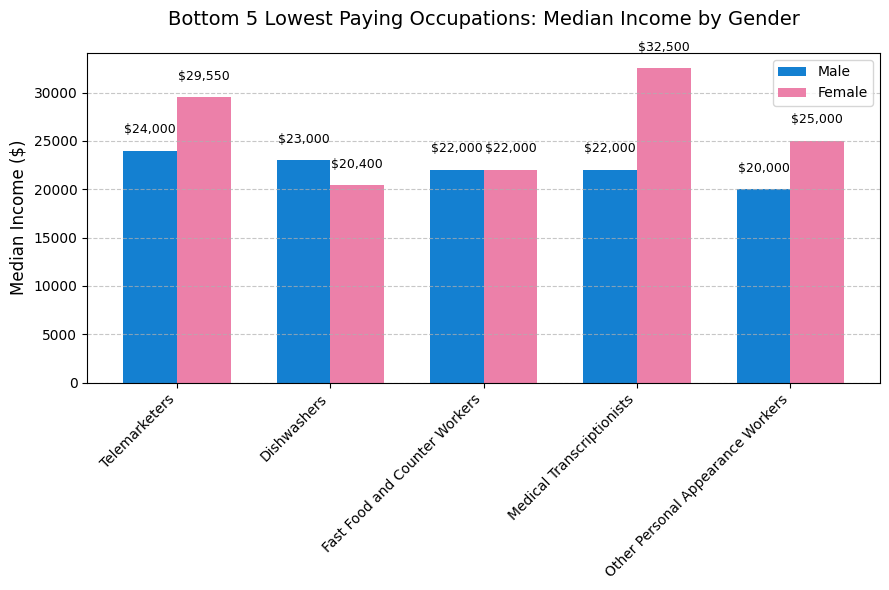

In [283]:
# 5. Create visualization function
def plot_occupation_earnings(df, title):
    plt.figure(figsize=(9, 6))
    width = 0.35
    
    occupations = df.index
    x = np.arange(len(occupations))
    
    male_bars = plt.bar(x - width/2, df['Male_Median'], width, 
                       label='Male', color='#1480D1')
    female_bars = plt.bar(x + width/2, df['Female_Median'], width, 
                         label='Female', color='#EC80A9')
    
    # Add value labels
    for i, (_, row) in enumerate(df.iterrows()):
        plt.text(i - width/2, row['Male_Median'] + 1500, 
                f"${row['Male_Median']:,.0f}", 
                ha='center', va='bottom', fontsize=9)
        plt.text(i + width/2, row['Female_Median'] + 1500, 
                f"${row['Female_Median']:,.0f}", 
                ha='center', va='bottom', fontsize=9)
    
    plt.title(title, fontsize=14, pad=20)
    plt.ylabel('Median Income ($)', fontsize=12)
    plt.xticks(x, occupations, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_occupation_earnings(top5_occupations, 
                        "Top 5 Highest Paying Occupations: Median Income by Gender")
plot_occupation_earnings(bottom5_occupations, 
                        "Bottom 5 Lowest Paying Occupations: Median Income by Gender")

### ADABoost

Base Model Setup

In [ ]:

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize base estimator - deeper than default for better performance
base_estimator = DecisionTreeRegressor(max_depth=5, random_state=777)

# Initialize AdaBoost with conservative parameters
ada = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=777,
    loss='linear'
)

# Train the model
ada.fit(x_train, y_train)

# Make predictions
y_pred = ada.predict(x_test)

# Evaluate
print("Initial AdaBoost Performance:")
perf(y_test, y_pred)

Initial AdaBoost Performance:


MSE,RMSE,MAE,MAPE,R-squared
3199931342.520591,56567.935640,50802.556768,8.004923,-1.024720


#### Tuning

##### n_estimators

In [ ]:
n_estimator_lst = range(10, 455, 70)  # Smaller range than GB as AdaBoost needs fewer

mape_train, mape_test = [], []

for n_estimators in n_estimator_lst:
    model = AdaBoostRegressor(
        estimator=base_estimator,
        n_estimators=n_estimators,
        random_state=777, loss = 'linear'
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mape_values_test = mean_absolute_percentage_error(y_test, y_pred)
    mape_test.append(mape_values_test)
    mape_values_train = mean_absolute_percentage_error(y_train, model.predict(x_train))
    mape_train.append(mape_values_train)



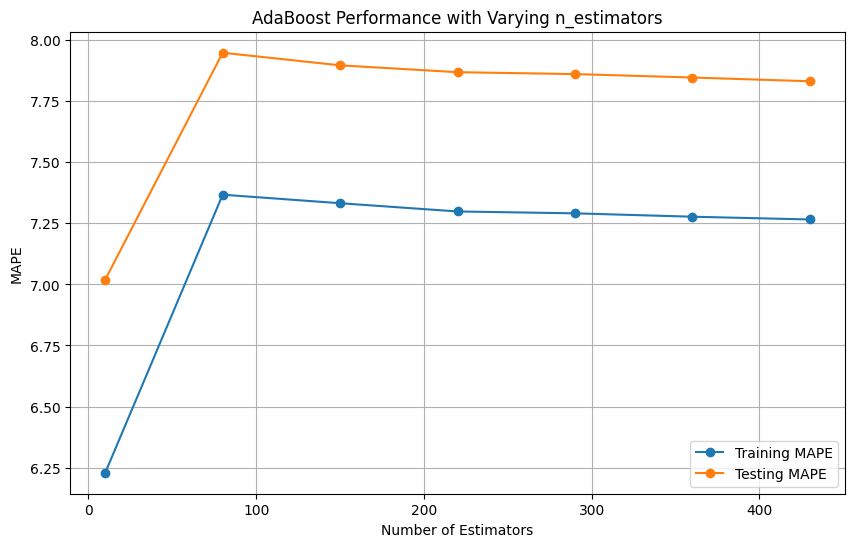

In [227]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(n_estimator_lst, mape_train, marker='o', label='Training MAPE')
plt.plot(n_estimator_lst, mape_test, marker='o', label='Testing MAPE')
plt.title('AdaBoost Performance with Varying n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('MAPE')
plt.legend()
plt.grid(True)
plt.show()

In [228]:
# display the results as a dataframe
n_est_results = pd.DataFrame({'Estimators': n_estimator_lst, 'MAPE': mape_test})
n_est_results.reset_index(drop=True, inplace=True)
display(n_est_results[0:10].style.hide(axis="index"))


Estimators,MAPE
10,7.019788
80,7.948884
150,7.897258
220,7.869160
290,7.861377
360,7.847364
430,7.831980


##### Learning Rates

In [ ]:
# Less computationally intensive than n_estimators tuning
learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
mape_train, mape_test = [], []

for lr in learning_rates:
    model = AdaBoostRegressor(
        estimator=base_estimator,
        n_estimators=100,
        learning_rate=lr,
        random_state=777,
        loss= 'linear'
    )

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mape_values_test = mean_absolute_percentage_error(y_test, y_pred)
    mape_test.append(mape_values_test)
    mape_values_train = mean_absolute_percentage_error(y_train, model.predict(x_train))
    mape_train.append(mape_values_train)    

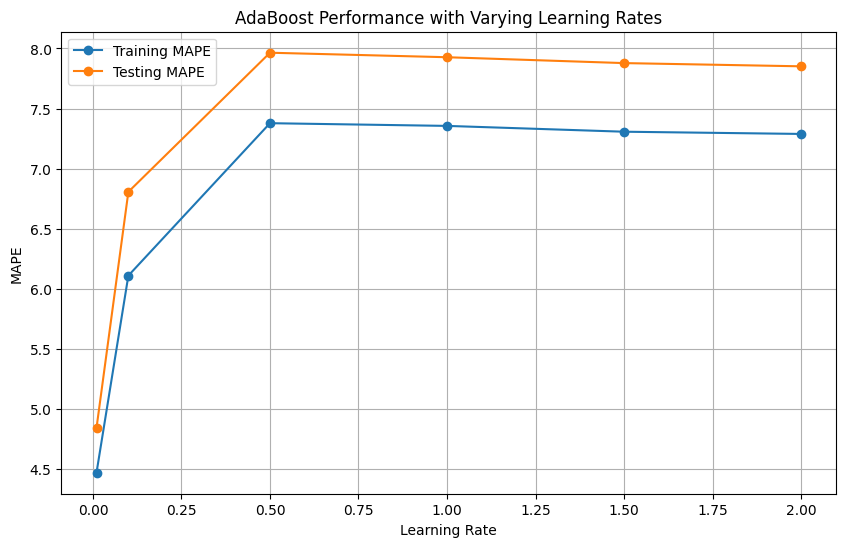

In [201]:
# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mape_train, marker='o', label='Training MAPE')
plt.plot(learning_rates, mape_test, marker='o', label='Testing MAPE')
plt.title('AdaBoost Performance with Varying Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('MAPE')
plt.legend()
plt.grid(True)
plt.show()

In [202]:
# outputs a table of the MAPE results
learning_rate_mape_results = pd.DataFrame({'learning_rates': learning_rates, 'MAPE': mape_test})
learning_rate_mape_results.reset_index(drop=True, inplace=True)
display(learning_rate_mape_results[0:10].style.hide(axis="index"))

learning_rates,MAPE
0.010000,4.841282
0.100000,6.806669
0.500000,7.964741
1.000000,7.927219
1.500000,7.878395
2.000000,7.851600


#### K-Fold Cross Validation

WARNING: This cell may take 10-30 minutes to run

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

# Initialize the model
model = AdaBoostRegressor(estimator=base_estimator, random_state=777)

# KFold for regression
kfold = KFold(n_splits=5, shuffle=True, random_state=777)

# Parameter grid
param_grid = {
    'n_estimators': [10, 50, 100,150,200],  
    'learning_rate': [0.01, 0.05, .1,.25],  
    'estimator__max_depth': [3,5,7]  
}

# GridSearchCV
gs = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=kfold,
    n_jobs=-1,  # Parallel processing
    scoring='neg_mean_absolute_percentage_error'
)

gs.fit(x_train, y_train)

print("\nBest parameters from GridSearchCV:")
print(gs.best_params_)
print(f"Best MAPE score: {-gs.best_score_:.4f}")



Best parameters from GridSearchCV:
{'estimator__max_depth': 7, 'learning_rate': 0.01, 'n_estimators': 10}
Best MAPE score: 4.1899


#### Final Tuned Model

In [230]:
# Initialize with best parameters
best_ada = gs.best_estimator_

# Train final model
best_ada.fit(x_train, y_train)

# Evaluate
print("\nTuned AdaBoost Performance:")
perf(y_test, best_ada.predict(x_test))


Tuned AdaBoost Performance:


MSE,RMSE,MAE,MAPE,R-squared
1002957369.342876,31669.502196,23199.102707,4.642449,0.365390


#### Feature Importance

Top 20 Important Features:


,Feature,Importance
1,EDUC,0.368244
2,OCCSOC,0.310783
0,AGE,0.128393
5,UHRSWORK,0.052102
3,IND,0.045955
34,SEX_Male,0.019132
33,SEX_Female,0.016258
6,TRANTIME,0.015285
11,"MARST_Married, spouse present",0.012784
7,CLASSWKR_Self-employed,0.009389


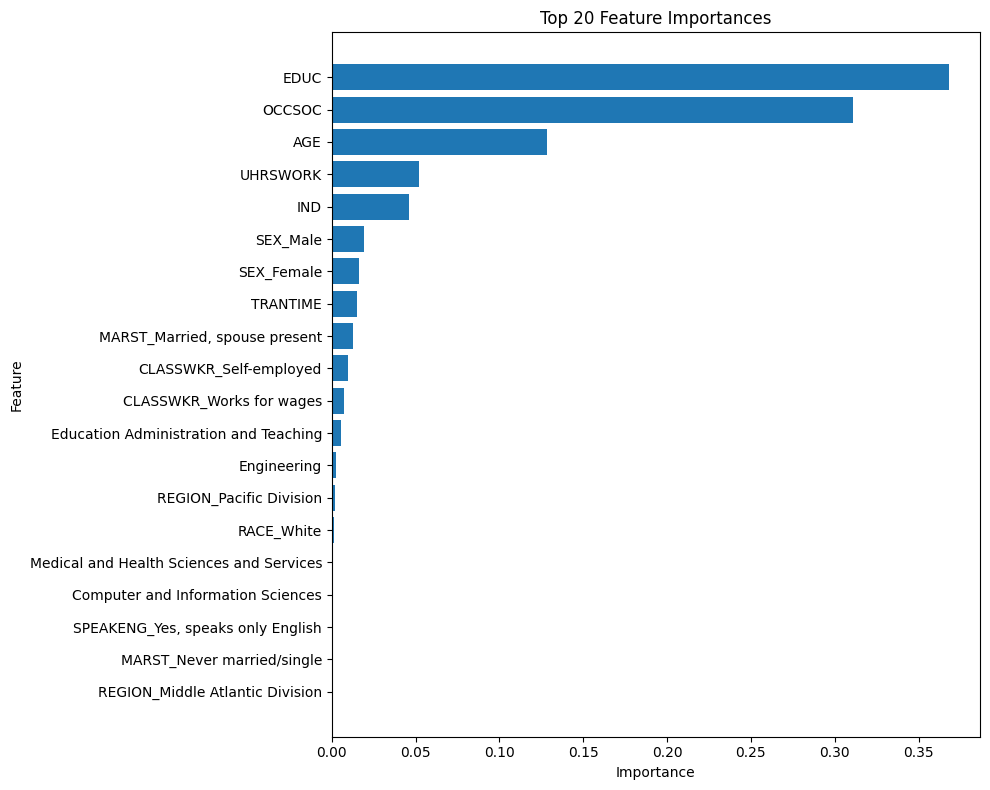

In [231]:
# Get feature names after encoding
feature_names = x_train.columns

# Get importance
importances = best_ada.feature_importances_

# Create DataFrame for easy viewing
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Show top 20 features
print("Top 20 Important Features:")
display(feat_imp.head(20))

# Plot
plt.figure(figsize=(10, 8))
plt.barh(feat_imp['Feature'].head(20), feat_imp['Importance'].head(20))
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
for i in range(8,20):
    # Get the top n feature names
    top_n_features = feat_imp.head(i)['Feature'].tolist()

    # Filter training and test sets to only these features
    X_train_topn = x_train[top_n_features]
    X_test_topn = x_test[top_n_features]

    # Initialize new AdaBoost model with your best hyperparameters
    best_params = gs.best_params_  # From your GridSearchCV
    ada_topn = AdaBoostRegressor(
        estimator=DecisionTreeRegressor(
            max_depth=best_params['estimator__max_depth'],
            random_state=777
        ),
        n_estimators=best_params['n_estimators'],
        learning_rate=best_params['learning_rate'],
        random_state=777,
        loss='linear'
    )

    # Train on top n features
    ada_topn.fit(X_train_topn, y_train)

    # Evaluate
    print(f"\nPerformance with Top {i} Features:")
    perf(y_test, ada_topn.predict(X_test_topn))



Performance with Top 8 Features:


MSE,RMSE,MAE,MAPE,R-squared
1009333480.344844,31770.009134,23247.592924,4.920871,0.361356



Performance with Top 9 Features:


MSE,RMSE,MAE,MAPE,R-squared
1006378728.272344,31723.472828,23208.500884,4.875508,0.363225



Performance with Top 10 Features:


MSE,RMSE,MAE,MAPE,R-squared
999093493.725786,31608.440229,23135.556216,4.602253,0.367835



Performance with Top 11 Features:


MSE,RMSE,MAE,MAPE,R-squared
999093493.725786,31608.440229,23135.556216,4.602253,0.367835



Performance with Top 12 Features:


MSE,RMSE,MAE,MAPE,R-squared
1003072569.637757,31671.320933,23207.481957,4.654979,0.365317



Performance with Top 13 Features:


MSE,RMSE,MAE,MAPE,R-squared
1000426382.745546,31629.517586,23190.009766,4.658950,0.366992



Performance with Top 14 Features:


MSE,RMSE,MAE,MAPE,R-squared
1002401395.838337,31660.723236,23200.754962,4.655138,0.365742



Performance with Top 15 Features:


MSE,RMSE,MAE,MAPE,R-squared
1003087282.755289,31671.553210,23213.142611,4.654785,0.365308



Performance with Top 16 Features:


MSE,RMSE,MAE,MAPE,R-squared
998192708.895587,31594.187897,23145.349992,4.657482,0.368405



Performance with Top 17 Features:


MSE,RMSE,MAE,MAPE,R-squared
1001115152.962490,31640.403805,23160.098687,4.645599,0.366556



Performance with Top 18 Features:


MSE,RMSE,MAE,MAPE,R-squared
1004360628.954921,31691.649199,23217.129414,4.653151,0.364502



Performance with Top 19 Features:


MSE,RMSE,MAE,MAPE,R-squared
1000995083.174378,31638.506336,23177.374541,4.643378,0.366632


####  Best ADABoost Model

In [234]:
# Use the top 11 features
top_n_features = feat_imp.head(11)['Feature'].tolist()

# Filter training and test sets to only these features
X_train_topn = x_train[top_n_features]
X_test_topn = x_test[top_n_features]

# Initialize new AdaBoost model with your best hyperparameters
best_params = gs.best_params_  # From your GridSearchCV
ada_best = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(
        max_depth=best_params['estimator__max_depth'],
        random_state=777
    ),
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    random_state=777,
    loss='linear'
)

# Train on top n features
ada_best.fit(X_train_topn, y_train)

# Evaluate
print(f"\nPerformance with Top 11 Features:")
perf(y_test, ada_best.predict(X_test_topn))



Performance with Top 11 Features:


MSE,RMSE,MAE,MAPE,R-squared
999093493.725786,31608.440229,23135.556216,4.602253,0.367835


<br>